In [1]:
#Get the Data
import sklearn
from sklearn.datasets import make_circles
n_samples = 1000
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [2]:
len(X),len(y)

(1000, 1000)

In [3]:
# Make Dataframe of circle data
import pandas as pd
df = pd.DataFrame({"X1":X[:,0],
                   "X2":X[:,1],
                   "label":y})
df.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


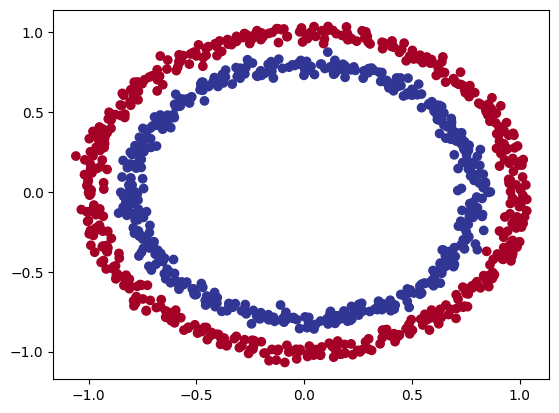

In [4]:
# visualize
import matplotlib.pyplot as plt
plt.scatter(df["X1"],
           df["X2"],
           c=df["label"],
           cmap=plt.cm.RdYlBu)

In [5]:
# Turn the Data into Tensor

import torch
from torch import nn
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

In [8]:
# Building a Model

import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [9]:
X_test

tensor([[-3.7519e-01,  6.8266e-01],
        [ 1.5380e-02,  9.6003e-01],
        [-7.0278e-01, -3.1472e-01],
        [-2.8525e-01,  9.6638e-01],
        [ 4.0242e-01, -7.4375e-01],
        [ 6.3228e-01, -5.7111e-01],
        [ 8.5607e-01,  5.4994e-01],
        [ 1.0034e+00,  1.9028e-01],
        [-7.4892e-01, -2.9511e-01],
        [ 5.3780e-02,  9.7388e-01],
        [-4.7020e-01,  7.8749e-01],
        [-2.1686e-01,  7.2418e-01],
        [ 9.7026e-01,  3.6688e-01],
        [-5.8446e-01, -5.7415e-01],
        [-9.1147e-01, -2.4631e-01],
        [ 7.6892e-01, -7.3249e-02],
        [ 3.8408e-01,  6.8299e-01],
        [-6.8364e-01,  7.1417e-01],
        [-5.7777e-01,  5.3652e-01],
        [-8.3274e-01,  4.6625e-01],
        [ 1.2448e-02,  9.8709e-01],
        [ 1.0091e+00, -2.1970e-01],
        [-6.6792e-01,  4.2861e-01],
        [-8.4405e-01,  6.1718e-01],
        [ 6.3680e-01,  7.4591e-01],
        [ 8.9413e-01,  3.6390e-01],
        [-2.3460e-01, -9.6400e-01],
        [ 8.5954e-01, -5.214

In [10]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)


    def forward(self, x):
        return self.layer_2(self.layer_1(x))

model_0 = CircleModelV0()
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [11]:
untrained_pred = model_0(X_test)
untrained_pred

tensor([[0.2717],
        [0.2868],
        [0.2854],
        [0.2676],
        [0.3700],
        [0.3785],
        [0.3540],
        [0.3757],
        [0.2818],
        [0.2888],
        [0.2621],
        [0.2803],
        [0.3676],
        [0.3018],
        [0.2698],
        [0.3700],
        [0.3196],
        [0.2511],
        [0.2639],
        [0.2503],
        [0.2857],
        [0.3902],
        [0.2620],
        [0.2443],
        [0.3334],
        [0.3628],
        [0.3373],
        [0.3912],
        [0.2646],
        [0.3144],
        [0.3414],
        [0.3281],
        [0.2639],
        [0.3516],
        [0.2580],
        [0.2996],
        [0.2738],
        [0.2964],
        [0.3411],
        [0.3076],
        [0.2601],
        [0.2731],
        [0.3214],
        [0.3759],
        [0.2618],
        [0.3037],
        [0.3807],
        [0.2828],
        [0.2966],
        [0.3750],
        [0.2666],
        [0.2616],
        [0.3890],
        [0.3693],
        [0.3560],
        [0

In [12]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0


Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [13]:
# Make Predictions
model_0.state_dict()

with torch.inference_mode():
  untrained_pred = model_0(X_test.to(device))
print(f"Length of Prediction: {len(untrained_pred)}, Shape :{untrained_pred.shape}")
untrained_pred

Length of Prediction: 200, Shape :torch.Size([200, 1])


tensor([[0.8162],
        [0.7007],
        [0.8065],
        [0.8202],
        [0.3105],
        [0.2438],
        [0.3117],
        [0.2034],
        [0.8274],
        [0.6875],
        [0.8683],
        [0.7595],
        [0.2411],
        [0.7236],
        [0.8984],
        [0.2592],
        [0.5165],
        [0.9423],
        [0.8758],
        [0.9666],
        [0.7056],
        [0.1440],
        [0.8963],
        [0.9921],
        [0.4256],
        [0.2707],
        [0.5312],
        [0.1610],
        [0.9310],
        [0.6492],
        [0.3961],
        [0.4542],
        [0.8517],
        [0.4301],
        [0.8891],
        [0.6339],
        [0.7921],
        [0.7521],
        [0.4962],
        [0.6903],
        [0.9104],
        [0.8693],
        [0.5082],
        [0.2844],
        [0.8606],
        [0.6078],
        [0.2449],
        [0.7209],
        [0.6564],
        [0.2714],
        [0.8283],
        [0.8596],
        [0.1647],
        [0.3296],
        [0.3198],
        [0

In [14]:
# Setup Loss Function and Optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [15]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc



In [16]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(X_test.to(device))[:5]
y_logits



tensor([[0.8162],
        [0.7007],
        [0.8065],
        [0.8202],
        [0.3105]])

In [17]:
# Use the sigmoid activation functions on our model
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.6934],
        [0.6683],
        [0.6914],
        [0.6943],
        [0.5770]])

In [18]:
y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))
y_pred_labels

# Check for Quality
print(torch.eq(y_pred_labels, y_test.to(device))[:5])

y_preds.squeeze()

tensor([[ True, False,  True, False,  True,  True, False, False,  True, False,
         False,  True, False,  True, False,  True,  True, False,  True, False,
         False, False,  True, False, False, False, False, False, False,  True,
          True, False, False,  True, False,  True,  True,  True,  True,  True,
          True,  True,  True, False, False,  True, False, False,  True,  True,
         False, False, False, False,  True, False,  True,  True,  True, False,
          True, False, False,  True,  True,  True,  True, False, False, False,
          True, False, False,  True,  True,  True,  True, False, False,  True,
         False,  True, False,  True,  True,  True, False, False, False, False,
          True,  True,  True,  True,  True, False,  True,  True, False,  True,
         False, False,  True,  True, False, False,  True, False, False,  True,
          True,  True, False,  True,  True, False,  True, False,  True, False,
          True, False, False,  True,  True, False,  

tensor([1., 1., 1., 1., 1.])

In [19]:
device

'cpu'

In [20]:
#Training Loop

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

# Putting the data to CUDA Device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Training and Evaluation Loop
for epoch in range(epochs):
    model_0.train()
    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # Turn Logists --> Pred Prob -->Pred Labels
    # Calculate Loss/Accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Testing
    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    # Print out whats happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.74196 | Acc: 50.00% | Test Loss: 0.73516 | Test Acc: 50.00%
Epoch: 10 | Loss: 0.70752 | Acc: 58.75% | Test Loss: 0.70607 | Test Acc: 56.50%
Epoch: 20 | Loss: 0.69877 | Acc: 52.00% | Test Loss: 0.69890 | Test Acc: 54.00%
Epoch: 30 | Loss: 0.69631 | Acc: 50.12% | Test Loss: 0.69704 | Test Acc: 54.00%
Epoch: 40 | Loss: 0.69548 | Acc: 49.62% | Test Loss: 0.69652 | Test Acc: 53.50%
Epoch: 50 | Loss: 0.69509 | Acc: 49.62% | Test Loss: 0.69635 | Test Acc: 51.50%
Epoch: 60 | Loss: 0.69485 | Acc: 49.38% | Test Loss: 0.69626 | Test Acc: 51.50%
Epoch: 70 | Loss: 0.69466 | Acc: 49.38% | Test Loss: 0.69620 | Test Acc: 50.50%
Epoch: 80 | Loss: 0.69450 | Acc: 49.75% | Test Loss: 0.69614 | Test Acc: 50.50%
Epoch: 90 | Loss: 0.69437 | Acc: 49.62% | Test Loss: 0.69609 | Test Acc: 51.00%


In [21]:
import requests
from pathlib import Path

# Download helper function
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions,plot_decision_boundary



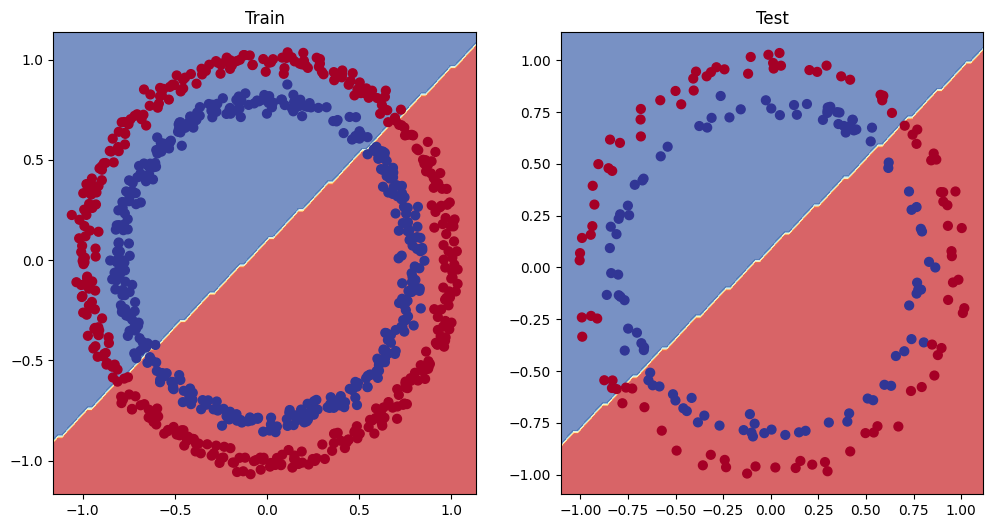

In [22]:
#Plot Decision boundary of the model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)


In [23]:
# Improving the Model

model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4610,  0.6947],
                      [ 0.3081,  0.4159],
                      [-0.5423, -0.0549],
                      [-0.1998, -0.5137],
                      [-0.4403,  0.2225]])),
             ('0.bias', tensor([-0.5061,  0.6940,  0.6491, -0.1302,  0.4708])),
             ('1.weight',
              tensor([[ 0.0463, -0.0830,  0.0954, -0.1759,  0.2046]])),
             ('1.bias', tensor([-0.1120]))])

In [24]:
class CircleModelV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [25]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)


In [26]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_1.train()
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_1.eval()
    with torch.inference_mode():
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396 | Acc: 50.88% | Test Loss: 0.69261 | Test Acc: 51.00%
Epoch: 100 | Loss: 0.69305 | Acc: 50.38% | Test Loss: 0.69379 | Test Acc: 48.00%
Epoch: 200 | Loss: 0.69299 | Acc: 51.12% | Test Loss: 0.69437 | Test Acc: 46.00%
Epoch: 300 | Loss: 0.69298 | Acc: 51.62% | Test Loss: 0.69458 | Test Acc: 45.00%
Epoch: 400 | Loss: 0.69298 | Acc: 51.12% | Test Loss: 0.69465 | Test Acc: 46.00%
Epoch: 500 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69467 | Test Acc: 46.00%
Epoch: 600 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 700 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 800 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%
Epoch: 900 | Loss: 0.69298 | Acc: 51.00% | Test Loss: 0.69468 | Test Acc: 46.00%


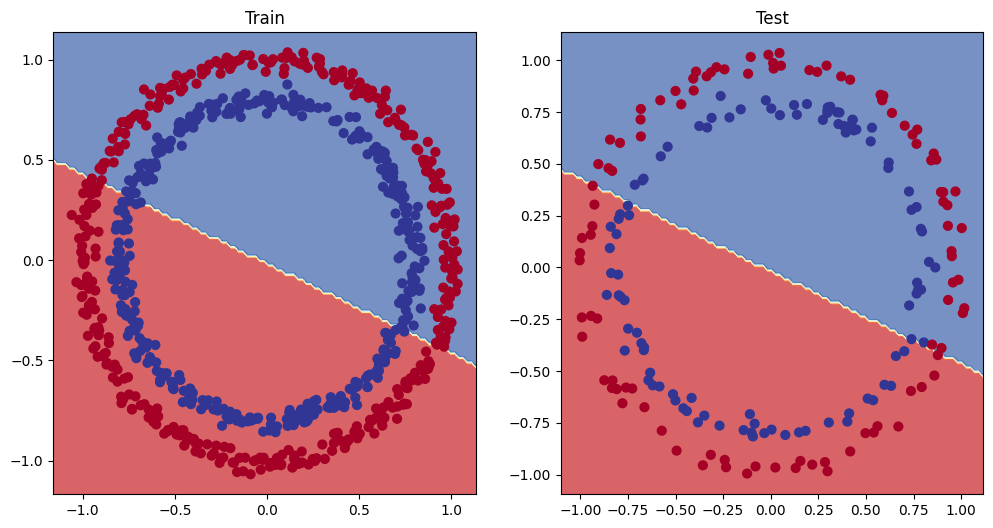

In [27]:
# PLot the decision Boundary
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)


In [28]:
# Preparing Data to see our model can fit a straight line

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression  + bias

print(len(X_regression), len(y_regression))
X_regression[:5], y_regression[:5]

100 100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [29]:
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]
len(X_train_regression), len(y_train_regression), len(X_test_regression), len(y_test_regression)

(80, 80, 20, 20)

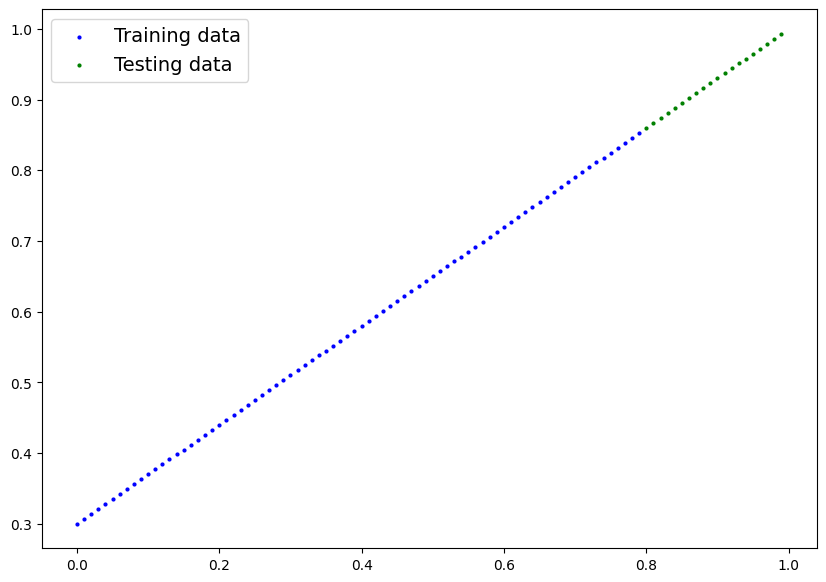

In [30]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression,
                 predictions=None)

In [31]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [32]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.01)

In [33]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    model_2.train()
    y_pred = model_2(X_train_regression)
    loss = loss_fn(y_pred, y_train_regression)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_2.eval()
    with torch.inference_mode():
        test_pred = model_2(X_test_regression)
        test_loss = loss_fn(test_pred, y_test_regression)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test Loss: {test_loss:.5f}")


Epoch: 0 | Loss: 0.75986 | Test Loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test Loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test Loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test Loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test Loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test Loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test Loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test Loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test Loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test Loss: 0.00360


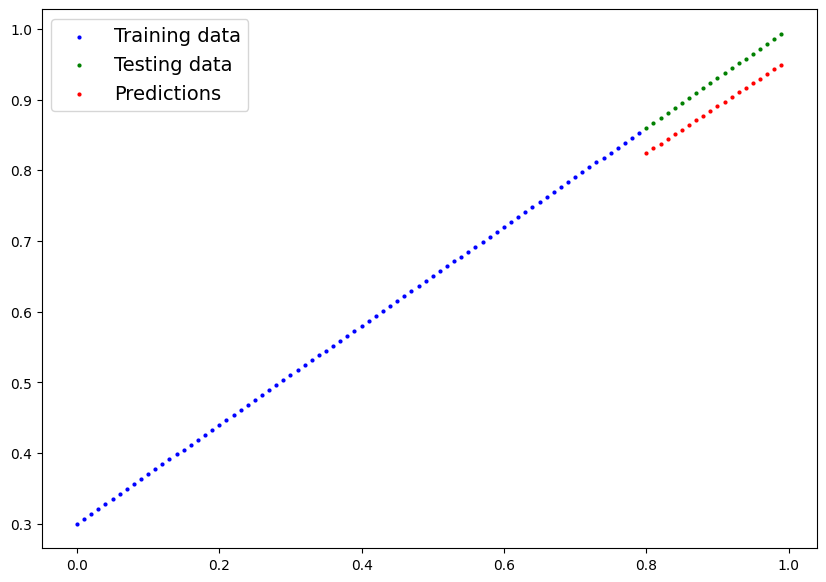

In [34]:
#Evaluation
model_2.eval()
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot Data and Prediction
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu())

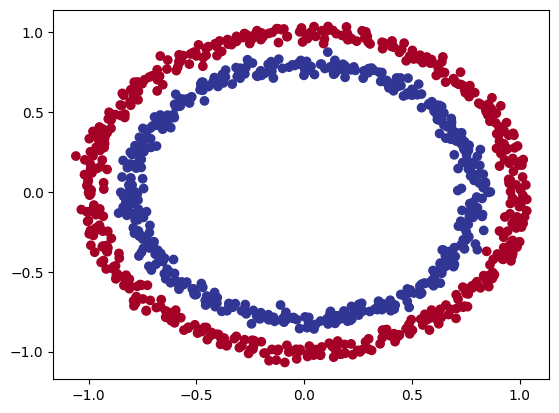

In [35]:
# Make and Plot Data

import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
import numpy as np

n_samples = 1000
X,y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)


In [36]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [37]:
# Building a model with non-linearlity

from torch import nn
class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [38]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.1)


In [39]:
torch.manual_seed(42)

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

epochs = 1000

for epoch in range(epochs):
    model_3.train()
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train, y_pred=y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f} | Acc: {acc:.2f}% | Test Loss: {test_loss:.5f} | Test Acc: {test_acc:.2f}%")



Epoch: 0 | Loss: 0.69295 | Acc: 50.00% | Test Loss: 0.69319 | Test Acc: 50.00%
Epoch: 100 | Loss: 0.69115 | Acc: 52.88% | Test Loss: 0.69102 | Test Acc: 52.50%
Epoch: 200 | Loss: 0.68977 | Acc: 53.37% | Test Loss: 0.68940 | Test Acc: 55.00%
Epoch: 300 | Loss: 0.68795 | Acc: 53.00% | Test Loss: 0.68723 | Test Acc: 56.00%
Epoch: 400 | Loss: 0.68517 | Acc: 52.75% | Test Loss: 0.68411 | Test Acc: 56.50%
Epoch: 500 | Loss: 0.68102 | Acc: 52.75% | Test Loss: 0.67941 | Test Acc: 56.50%
Epoch: 600 | Loss: 0.67515 | Acc: 54.50% | Test Loss: 0.67285 | Test Acc: 56.00%
Epoch: 700 | Loss: 0.66659 | Acc: 58.38% | Test Loss: 0.66322 | Test Acc: 59.00%
Epoch: 800 | Loss: 0.65160 | Acc: 64.00% | Test Loss: 0.64757 | Test Acc: 67.50%
Epoch: 900 | Loss: 0.62362 | Acc: 74.00% | Test Loss: 0.62145 | Test Acc: 79.00%


In [40]:
# Make Prediction
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test).squeeze()))
y_preds[:5],y_test[:5]

(tensor([1., 0., 1., 0., 0.]), tensor([1., 0., 1., 0., 1.]))

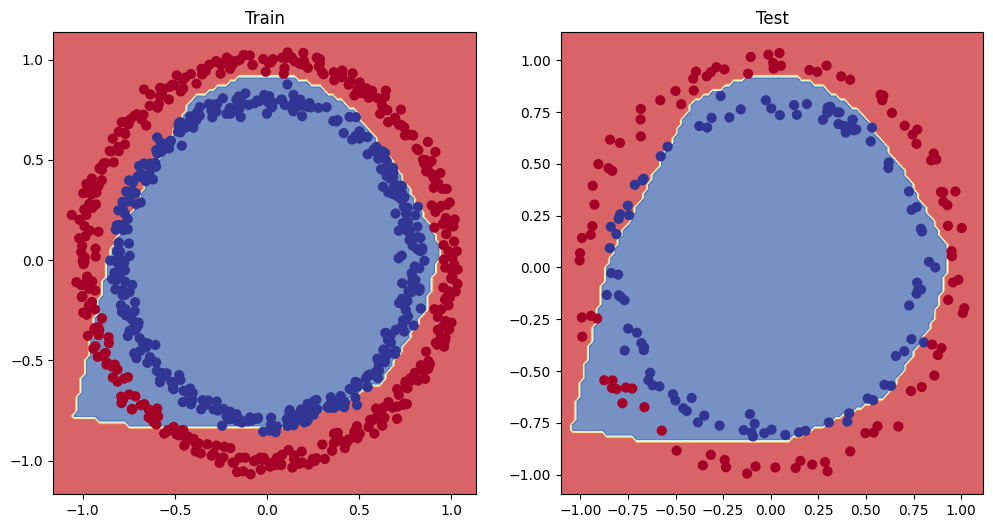

In [41]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

In [43]:
def relu(x: torch.Tensor):
  return torch.maximum(torch.tenor(0), x)



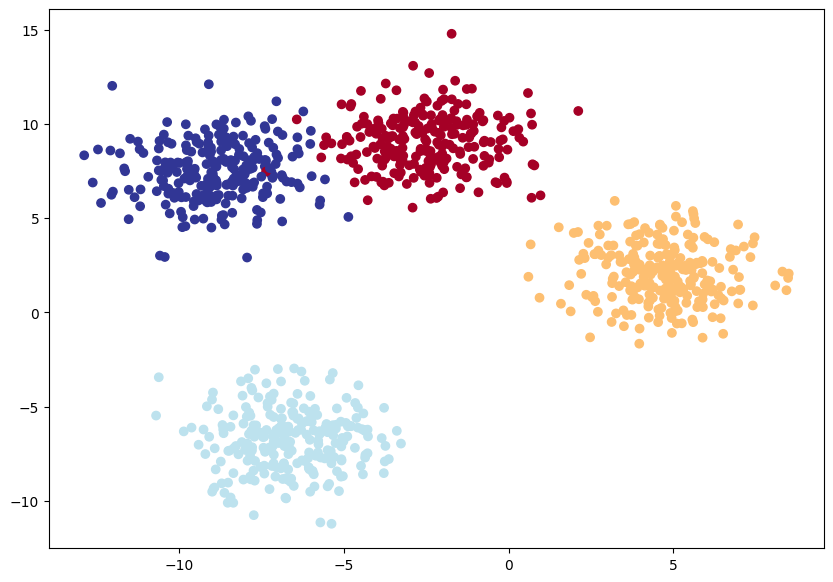

In [45]:
# Multi-class classification Problem

import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
from sklearn.model_selection import train_test_split

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED =42

# Creating multi-class dat
X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std=1.5,
                            random_state=RANDOM_SEED)

# Turn data into Tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.float)

# Split the datse
X_train, X_test, y_train, y_test = train_test_split(X_blob, y_blob, test_size=0.2, random_state=RANDOM_SEED)
X_train[:5], y_train[:5]

# Plot the data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)

In [46]:
# Building a multi-class classification
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [49]:
# Build a multo-class classification model
class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units):
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)

model_4 = BlobModel(input_features=2, output_features=4, hidden_units=8).to(device)
model_4


BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [50]:
# Create a loss function and Optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(), lr=0.1)


In [51]:
model_4(X_train.to(device))

tensor([[-0.1847,  0.0503, -0.3884,  0.1031],
        [-0.9116,  0.0288, -0.3780, -0.6437],
        [-0.1260,  0.7676,  0.9819,  0.1407],
        ...,
        [-0.8856,  0.0219, -0.4263, -0.6141],
        [-0.1394,  0.5850,  0.7019,  0.1555],
        [-0.9856,  0.0872, -0.1031, -0.7534]], grad_fn=<AddmmBackward0>)

In [54]:
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_test.to(device))
y_logits

tensor([[-1.9182e-01,  7.9295e-02, -3.9771e-01,  6.9818e-02],
        [-1.0829e+00,  8.8822e-02, -1.0186e-01, -8.6492e-01],
        [-1.4879e-01,  6.8826e-01,  8.1748e-01,  1.3469e-01],
        [-1.7440e-01,  5.9695e-03, -3.7029e-01,  1.6148e-01],
        [-7.5998e-01,  4.2134e-02, -5.6517e-01, -4.5137e-01],
        [-1.2423e+00,  1.0856e-01, -6.2964e-02, -1.0634e+00],
        [-1.7866e-01,  8.4352e-01,  9.3190e-01,  7.6444e-02],
        [-8.6151e-01,  2.4412e-02, -3.9040e-01, -5.8377e-01],
        [-1.1187e-01,  5.7056e-01,  7.5212e-01,  1.7759e-01],
        [-8.3042e-01,  2.2533e-02, -4.3939e-01, -5.4605e-01],
        [-8.7776e-01,  3.5239e-02, -3.1912e-01, -6.0322e-01],
        [-1.9794e-01,  1.0407e-01, -4.0569e-01,  4.1326e-02],
        [-8.1873e-01,  3.5273e-02, -5.1531e-01, -5.2645e-01],
        [-9.3932e-01,  2.5129e-02, -4.2635e-01, -6.7901e-01],
        [-9.5905e-01,  3.1319e-02, -4.6835e-01, -7.0071e-01],
        [-1.0193e+00,  7.8267e-02, -1.2320e-01, -7.8335e-01],
        

In [57]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")


NameError: name 'X_blob_train' is not defined

In [58]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 927.3/927.3 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 77.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall